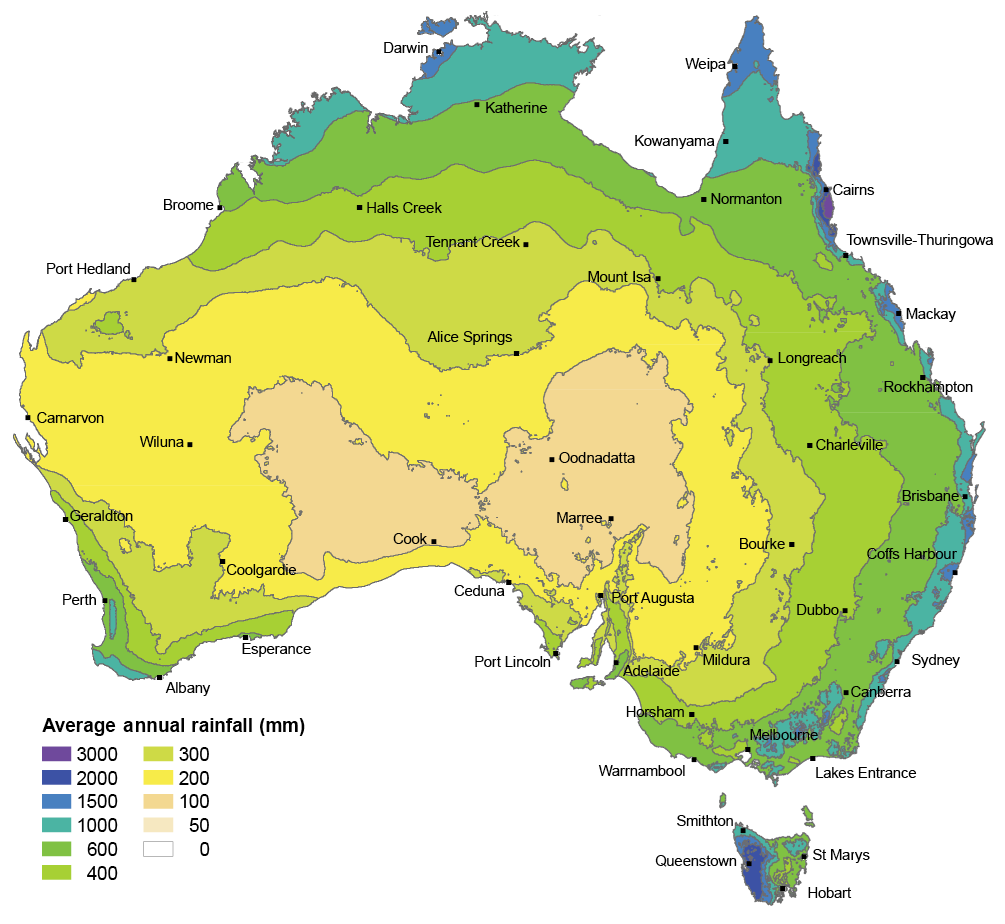

Rainfall in Australia is highly variable, largely because of large-scale atmospheric and oceanic drivers that affect the region.

**Let us dive deep into understanding and exploring various aspects of rainfall in Australia.**

# <center><span style='color:red'>Importing libraries & data </span></center>

In [ ]:
import numpy as np
import pandas as pd

#Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [ ]:
weather=pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
weather.head()

In [ ]:
#Shape of dataframe
print('Shape of dataframe: ',weather.shape)
print('\n')

#Names of columns of dataframe
print('Names of columns of dataframe: ',weather.columns)

In [ ]:
#Null values
msno.matrix(weather)

weather.isnull().sum()

**There are many missing rows in the entire dataset. Imputation is required.**

In [ ]:
#Statistical insights into the dataset
weather.describe()

# <center><span style='color:red'>EDA and missing values </span></center>

In [ ]:
sns.countplot(weather['RainTomorrow'])

In [ ]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather['Day'] = weather['Date'].dt.day
weather['Year'] = weather['Date'].dt.year

In [ ]:
#Dropping the Date column since day and month have already been extracted as integer values.
weather.drop('Date',axis=1,inplace=True)

In [ ]:
#NUMERICAL COLUMNS
numerical_columns=weather._get_numeric_data().columns
print('Numerical columns:', list(numerical_columns))
print('\n')

#CATEGORICAL COLUMNS
categorical_columns=list(set(weather)-set(numerical_columns))
print('Categorical colums: ',categorical_columns)

In [ ]:
plt.figure(figsize=(18,8))

#Define the mask to set the values in the upper triangle to True
mask_1=np.triu(np.ones_like(weather.corr(),dtype=np.bool))   
heatmap=sns.heatmap(weather.corr(),annot=True,cmap='coolwarm',mask=mask_1)
heatmap.set_title('Correlation heatmap',fontdict={'fontsize':16})

### MinTemp, MaxTemp, Evaporation & Sunshine

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(30,20))
sns.set_style('whitegrid')

#Maximum Temperature
plt.subplot(2,2,1)
plt.title('Maximum Temperature variation over the years',fontweight='bold',fontsize=20)
plt.xlabel('MaxTemp',fontweight='bold',fontsize=16)
sns.distplot(weather['MaxTemp'],color='indigo',bins=25)

#Minimum Temperature
plt.subplot(2,2,2)
plt.title('Minimum Temperature variation over the years',fontweight='bold',fontsize=20)
plt.xlabel('MinTemp',fontweight='bold',fontsize=16)
sns.distplot(weather['MinTemp'],color='blue')

#Sunshine
plt.subplot(2,2,3)
sns.distplot(weather['Sunshine'],bins=50,color='green')
plt.title('Sunshine over the years',fontweight='bold',fontsize=20)
plt.xlabel('Sunshine',fontweight='bold',fontsize=16)

#Evaporation
plt.subplot(2,2,4)
sns.distplot(weather['Evaporation'],bins=50,color='red')
plt.title('Evaporation over the years',fontweight='bold',fontsize=20)
plt.xlabel('Evaporation',fontweight='bold',fontsize=16)


print('\033[1m'+'The mean max. temp. is: ', weather['MaxTemp'].mean())
print('\033[1m'+'The mean min. temp. is: ', weather['MinTemp'].mean())
print('\033[1m'+'The mean sunshine over the years is: ', weather['Sunshine'].mean())
print('\033[1m'+'The mean evaporation over the years is: ', weather['Evaporation'].mean())

In [ ]:
#Imputing missing values(with mean) 

weather['MinTemp'].fillna(weather['MinTemp'].mean(),inplace=True)
weather['MaxTemp'].fillna(weather['MaxTemp'].mean(),inplace=True)
weather['Evaporation'].fillna(weather['Evaporation'].mean(),inplace=True)
weather['Sunshine'].fillna(weather['Sunshine'].mean(),inplace=True)

### Rainfall 

In [ ]:
plt.figure(figsize=(18,6))
sns.distplot(weather['Rainfall'],bins=50,color='black')
plt.title('Rainfall over the years',fontweight='bold',fontsize=16)
plt.show()


print('\033[1m'+'The mean rainfall over the years is: ', weather['Rainfall'].mean())

In [ ]:
#Filling missing values 
weather['Rainfall'].fillna(weather['Rainfall'].mean(),inplace=True)

In [ ]:
sns.set_style('darkgrid')
fig,axes=plt.subplots(6,2,figsize=(50,75))

#WindSpeed9am
plt.subplot(6,2,1)
sns.distplot(weather['WindSpeed9am'],bins=50,color='black')
plt.title('Wind Speed at 9am',fontweight='bold',fontsize=24)
plt.xlabel('Wind Speed 9am',fontweight='bold',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)

#WindSpeed3pm
plt.subplot(6,2,2)
sns.distplot(weather['WindSpeed3pm'],bins=50,color='black')
plt.title('Wind Speed at 3pm',fontweight='bold',fontsize=24)
plt.xlabel('Wind Speed 3pm',fontweight='bold',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)


#Humidity9am
plt.subplot(6,2,3)
sns.distplot(weather['Humidity9am'],bins=50,color='red')
plt.title('Humidity at 9am',fontweight='bold',fontsize=24)
plt.xlabel('Humidity 9am',fontweight='bold',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)


#Humidity3pm
plt.subplot(6,2,4)
sns.distplot(weather['Humidity3pm'],bins=50,color='red')
plt.title('Humidity at 3pm',fontweight='bold',fontsize=24)
plt.xlabel('Humidity 3pm',fontweight='bold',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)


#Pressure9am
plt.subplot(6,2,5)
sns.distplot(weather['Pressure9am'],bins=50,color='orange')
plt.title('Pressure at 9am',fontweight='bold',fontsize=24)
plt.xlabel('Pressure 9am',fontweight='bold',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)


#Pressure3pm
plt.subplot(6,2,6)
sns.distplot(weather['Pressure3pm'],bins=50,color='orange')
plt.title('Pressure at 3pm',fontweight='bold',fontsize=24)
plt.xlabel('Pressure 3pm',fontweight='bold',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)


#Cloud9am
plt.subplot(6,2,7)
sns.distplot(weather['Cloud9am'],bins=50,color='green')
plt.title('Cloud 9am',fontweight='bold',fontsize=24)
plt.xlabel('Cloud 9am',fontweight='bold',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)


#Cloud3pm
plt.subplot(6,2,8)
sns.distplot(weather['Cloud3pm'],bins=50,color='green')
plt.title('Cloud 3pm',fontweight='bold',fontsize=24)
plt.xlabel('Cloud 3pm',fontweight='bold',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)


#Temp9am
plt.subplot(6,2,9)
sns.distplot(weather['Temp9am'],bins=50,color='violet')
plt.title('Temp 9am',fontweight='bold',fontsize=24)
plt.xlabel('Temp 9am',fontweight='bold',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)


#Temp3pm
plt.subplot(6,2,10)
sns.distplot(weather['Temp3pm'],bins=50,color='violet')
plt.title('Temp 3pm',fontweight='bold',fontsize=24)
plt.xlabel('Temp 3pm',fontweight='bold',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)


#WindGustSpeed
plt.subplot(6,2,11)
sns.distplot(weather['WindGustSpeed'],bins=50,color='blue')
plt.title('WindGustSpeed',fontweight='bold',fontsize=24)
plt.xlabel('WindGustSpeed',fontweight='bold',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.tight_layout()


print('\033[1m'+'The mean WindSpeed9am is: ', weather['WindSpeed9am'].mean())
print('\033[1m'+'The mean WindSpeed3pm is: ', weather['WindSpeed3pm'].mean())
print('\033[1m'+'The mean Humidity9am is: ', weather['Humidity9am'].mean())
print('\033[1m'+'The mean Humidity3pm is: ', weather['Humidity3pm'].mean())
print('\033[1m'+'The mean Pressure9am is: ', weather['Pressure9am'].mean())
print('\033[1m'+'The mean Pressure3pm is: ', weather['Pressure3pm'].mean())
print('\033[1m'+'The mean Cloud9am is: ', weather['Cloud9am'].mean())
print('\033[1m'+'The mean Cloud3pm is: ', weather['Cloud3pm'].mean())
print('\033[1m'+'The mean Temp9am is: ', weather['Temp9am'].mean())
print('\033[1m'+'The mean Temp9am is: ', weather['Temp3pm'].mean())
print('\033[1m'+'The mean WindGustSpeed is: ', weather['WindGustSpeed'].mean())

In [ ]:
#Imputing missing values with mean values

weather['WindSpeed9am'].fillna(weather['WindSpeed9am'].mean(),inplace=True)
weather['WindSpeed3pm'].fillna(weather['WindSpeed3pm'].mean(),inplace=True)
weather['Humidity9am'].fillna(weather['Humidity9am'].mean(),inplace=True)
weather['Humidity3pm'].fillna(weather['Humidity3pm'].mean(),inplace=True)
weather['Pressure9am'].fillna(weather['Pressure9am'].mean(),inplace=True)
weather['Pressure3pm'].fillna(weather['Pressure3pm'].mean(),inplace=True)
weather['Cloud9am'].fillna(weather['Cloud9am'].mean(),inplace=True)
weather['Cloud3pm'].fillna(weather['Cloud3pm'].mean(),inplace=True)
weather['Temp9am'].fillna(weather['Temp9am'].mean(),inplace=True)
weather['Temp3pm'].fillna(weather['Temp3pm'].mean(),inplace=True)
weather['WindGustSpeed'].fillna(weather['WindGustSpeed'].mean(),inplace=True)

## Categorical columns

### WindGustDir

In [ ]:
#WindGustDir
values=weather.groupby('WindGustDir').Year.count()
directions=values.index
count_of_direction=list(values)
fig=px.pie(values=count_of_direction,names=directions,color_discrete_sequence=px.colors.sequential.RdBu,title='WinGustDir')
fig.show()

#WindDir9am
values_9am=weather.groupby('WindDir9am').Year.count()
directions_9am=values_9am.index
count_of_direction_9am=list(values_9am)

fig,axes=plt.subplots(1,2,figsize=(50,25))
axes[0].pie(count_of_direction_9am,labels=directions_9am,autopct='%1.1f%%',explode=(0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0),textprops={'fontsize':30},)
axes[0].set_title('WindDir9am',fontweight='bold',fontsize=36)

#WindDir3pm
values_3pm=weather.groupby('WindDir3pm').Year.count()
directions_3pm=values_3pm.index
count_of_direction_3pm=list(values_3pm)

axes[1].pie(count_of_direction_3pm,labels=directions_3pm,explode=(0,0,0,0,0,0,0,0,0,0.1,0,0,0,0,0,0),textprops={'fontsize':30},autopct='%1.1f%%')
axes[1].set_title('WindDir3pm',fontweight='bold',fontsize=36)

plt.show()

In [ ]:
#Imputing values in categorical columns

weather['WindGustDir'].fillna('W',inplace=True)
weather['WindDir9am'].fillna('N',inplace=True)
weather['WindDir3pm'].fillna('SE',inplace=True)

### Bivariate Analysis

In [ ]:
plt.subplots(2,2,figsize=(16,14))

#Sunshine vs rainfall
plt.subplot(2,2,1)
sns.scatterplot(data=weather,x='Sunshine',y='Rainfall',color='red')
plt.title('Sunshine vs Rainfall',fontweight='bold',fontsize=20)

#Evaporation vs rainfall
plt.subplot(2,2,2)
sns.scatterplot(data=weather,x='Evaporation',y='Rainfall',color='orange')
plt.title('Evaporation vs Rainfall',fontweight='bold',fontsize=20)

#MaxTemp vs rainfall
plt.subplot(2,2,3)
sns.scatterplot(data=weather,x='MaxTemp',y='Rainfall',color='purple')
plt.title('MaxTemp vs Rainfall',fontweight='bold',fontsize=20)

#MinTemp vs rainfall
plt.subplot(2,2,4)
sns.scatterplot(data=weather,x='MinTemp',y='Rainfall',color='indigo')
plt.title('MinTemp vs Rainfall',fontweight='bold',fontsize=20)
plt.show()

In [ ]:
i=0
l=[]
m=[]
for i in weather['RainToday']:
    if i=='Yes':
        l.append(i)
    else:
        m.append(i)
print(len(l),len(m))

a=[]
b=[]
for i in weather['RainTomorrow']:
    if i=='Yes':
        a.append(i)
    else:
        b.append(i)
print(len(a),len(b))

In [ ]:
weather['RainToday'].fillna('No',inplace=True)
weather['RainTomorrow'].fillna('No',inplace=True)

In [ ]:
sns.heatmap(weather.isnull())

The dataset does not contain any more null values. All have been imputed.

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(weather[numerical_columns].corr(),annot=True)

# <center><span style='color:red'>Feature engineering </span></center>

## Handling numerical data

### Handling outliers 
**Drawing box plots to identify ourliers in the numerical columns**

In [ ]:
a=4
b=4
c=1
fig = plt.figure(figsize=(35,32))
for i in weather:
    if weather[i].dtype=='float64':
        plt.subplot(a, b, c)
        sns.boxplot(weather[i])
        c = c+1
    else:
        continue
plt.tight_layout()
plt.show()    

From the box plots made above it can be seen that the following columns contain outliers:

  Rainfall
  
  Evaporation
  
  WindGustSpeed
  
  WindSpeed9am
  
  WindSpped3pm

In [ ]:
#Removing outliers
for i in weather:
    if weather[i].dtype=='float64':
        q1 = weather[i].quantile(0.25)
        q3 = weather[i].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        med = np.median(weather[i])
        for j in weather[i]:
            if j > Upper_tail or j < Lower_tail:
                weather[i] = weather[i].replace(j, med)
    else:
        continue
#Since outliers affect the mean value as well thus here we are relacing the outliers with median values.

### Handling categorical data

#### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
categorical_columns=['RainTomorrow', 'WindDir3pm', 'WindGustDir', 'WindDir9am', 'RainToday', 'Location']
for i in categorical_columns:
    weather[i]=label_encoder.fit_transform(weather[i])

In [ ]:
weather.head()

In [ ]:
X=weather.drop('RainTomorrow',axis=1)
y=weather['RainTomorrow']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.head(2)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)

In [ ]:
X_train.shape

In [ ]:
lr.fit(X_train,y_train)
predict=lr.predict(X_test)

In [ ]:
predict

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(predict,y_test))

In [ ]:
print(confusion_matrix(predict,y_test))

In [ ]:
lr.score(X_test,y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(predict,y_test)))

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

In [ ]:
prediction=dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(prediction,y_test))

In [ ]:
print(confusion_matrix(prediction,y_test))

In [ ]:
dtree.score(X_test,y_test)

#### Random Forest classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train,y_train)

In [ ]:
RandomForestRegressorScore = rf.score(X_test,y_test)

In [ ]:
print(classification_report(prediction,y_test))

In [ ]:
print(confusion_matrix(prediction,y_test))

In [ ]:
rf.score(X_test,y_test)

**XGBoost**

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
xgb_model=XGBClassifier()

In [ ]:
xgb_model.fit(X_train,y_train)

In [ ]:
predictions_xgb=xgb_model.predict(X_test)

In [ ]:
predictions_xgb

In [ ]:
xgb_model.score(X_test,y_test)

**KNearestNeighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)

In [ ]:
predictions

In [ ]:
knn.score(X_test,y_test)

In [ ]:
classification_report(predictions,y_test)
print('\n')
confusion_matrix(predictions,y_test)

**THANKS FOR READING!!**

**DO UPVOTE IF YOU LIKED IT :)**